<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Root Finding Problem Statement**
**Root finding** is the process of determining the values of a variable for which a function equals zero, also referred to as roots or zeros. The **root-finding problem statement** finds the solution of an equation of the form f(x)=0. The quadratic formula is an example of root finding.  

Common methods for root finding include:
1. Bisection method
2. Newton-Rahpson method
3. False Position method
4. Secant method

The following coding example uses fsolve from scipy.optimize to determine the roots of the function: x^3-6x^2+11x-6.


Roots found using fsolve: [1. 1. 3.]


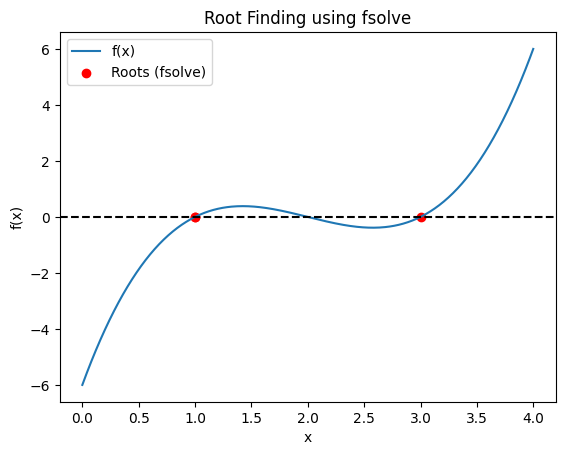

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# define function
def f(x):
    return x**3 - 6*x**2 + 11*x - 6

# initial solving
initial_guesses = [0.5, 2.5, 3.5]

# use s solve to solve for roots
roots = fsolve(f, initial_guesses)

print(f"Roots found using fsolve: {roots}")

# plot
x_vals = np.linspace(0, 4, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color='black', linestyle='--')
plt.scatter(roots, np.zeros_like(roots), color='red', label="Roots (fsolve)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Root Finding using fsolve")
plt.show()



# **Tolerance**
**Error** is a deviation from an expected or computed value. **Tolerance** is the level of error that is acceptable for an engineering application; therefore, if a computer program converges to a solution, it has found a solution with an error smaller than the tolerance. In numerical computations, tolerance is often used as stopping criterion for methods like root finding and optimization.

There are several types of tolerance, including absolute tolerance (which ensures that the error is below a fixed threshold) and relative tolerance (which ensures that the error is small relative to the value of the solution).

The following example uses the Newton-Raphson method with tolerance.

In [8]:
import numpy as np

# function
def f(x):
    return x**3 - 6*x**2 + 11*x - 6

def df(x): #derivative
    return 3*x**2 - 12*x + 11

# newton's method with tolerance
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        if abs(fx) < tol:  #
            print(f"Converged to root {x} after {i+1} iterations.")
            return x
        x_new = x - fx / dfx

        if abs(x_new - x) < tol:  # tolerance check
            print(f"Converged to root {x_new} after {i+1} iterations.")
            return x_new

        x = x_new
    print("Max iterations reached without full convergence.")
    return x


initial_guess = 3.5
tolerance = 1e-6
root = newton_method(f, df, initial_guess, tol=tolerance)

print(f"Root found: {root}")


Converged to root 3.000000000015066 after 6 iterations.
Root found: 3.000000000015066


# **Bisection Method**
The **Intermediate Value Theorem** says that f(*x*) is a continuous between a and b, and *sign(f(a))* does not equal *sign(f(b))*, then there must be a c, such that a<c<b and f(c)=0. The **bisection method** uses the intermediate value iteratively to find roots within a given interval [a,b].

The bisection method has the following steps:
1. Choose an interval [a, b] where f(a) and f(b) have opposite signs.
2. Compute the midpoint.
3. Check if f(c) is wihin tolerance.
4. Determine which subinterval contains the root.
5. Repeat the process.

The following example ues the bisection method to find the root.


In [1]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):

    if f(a) * f(b) >= 0:
        raise ValueError("Function values at a and b must have opposite signs.")

    iteration = 0
    while (b - a) / 2 > tol and iteration < max_iter:
        c = (a + b) / 2
        fc = f(c)

        if abs(fc) < tol:
            print(f"Converged to root {c} after {iteration+1} iterations.")
            return c

        if f(a) * fc < 0:
            b = c
        else:
            a = c

        iteration += 1
    root = (a + b) / 2
    print(f"Converged to root {root} after {iteration} iterations.")
    return root


def f(x):
    return x**3 - 6*x**2 + 11*x - 6


a, b = 0.5, 1.5  #interval containing root

root = bisection_method(f, a, b)

print(f"Root found: {root}")



Converged to root 1.0 after 1 iterations.
Root found: 1.0


# **The Newton-Raphson Method**
The **Newton-Raphson Method** is a numerical technique used to find the roots of a real-valued function. A **Newton step** computes an improved guess, *xi*, using a previous guess, *xi-1*. It is given by the equation:

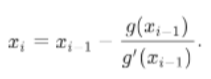


Visually, this appears like:


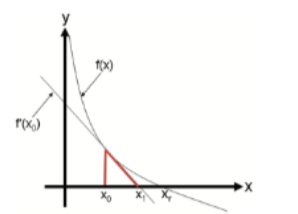

Thus, the Newton-Raphson method of finding roots iterates Newton steps from *x0* until the error is less than the tolerance.

The following example uses the Newton-Raphson method to find the root.

In [7]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """Finds a root of f(x) using the Newton-Raphson method."""
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        if abs(fx) < tol:  # Check if function value is close to zero
            print(f"Converged to root {x:.6f} after {i+1} iterations.")
            return x

        if dfx == 0:
            raise ValueError("Zero derivative encountered. Newton's method fails.")

        x_new = x - fx / dfx  # Newton-Raphson formula

        if abs(x_new - x) < tol:
            print(f"Converged to root {x_new:.6f} after {i+1} iterations.")
            return x_new

        x = x_new  # Update x

    print("Max iterations reached without full convergence.")
    return x

# Define function and derivative
def f(x):
    return x**3 - 4*x - 9  # Example function

def df(x):
    return 3*x**2 - 4  # Derivative of f(x)

# Initial guess
x0 = 2
# Find the root
root = newton_raphson(f, df, x0)
print(f"Root found: {root:.6f}")


Converged to root 2.706528 after 6 iterations.
Root found: 2.706528
